<a href="https://colab.research.google.com/github/we-insub/SelfStudy_Numpy_OpenCV_Deep/blob/main/021_Corner_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 내가느낀 Corner_Haris 
일정한 사진의 패턴을 갖고 배열을 확인했을때
배열의 값이 변환되는곳을 포인트로 잡아냄

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
flat_chess = cv2.imread("/content/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

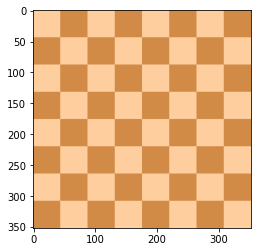

In [4]:
plt.imshow(flat_chess)

In [5]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

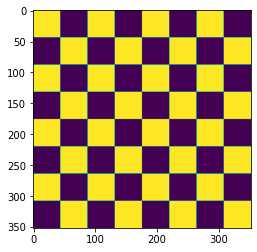

In [6]:
plt.imshow(gray_flat_chess)

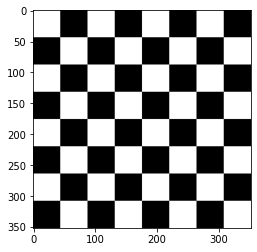

In [7]:
plt.imshow(gray_flat_chess,cmap="gray")

In [9]:
real_chess = cv2.imread("/content/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

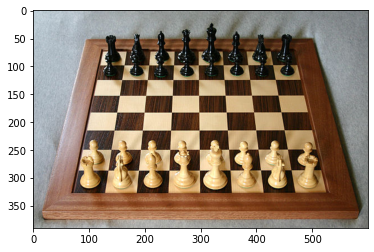

In [10]:
plt.imshow(real_chess)

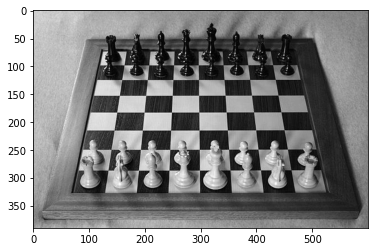

In [12]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap="gray") 

In [13]:
gray_flat_chess

array([[197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197]], dtype=uint8)

In [14]:
gray = np.float32(gray_flat_chess)

## Harris 알고리즘
배열을 보고 배열에서 값이 다른곳을 모서리

In [15]:
gray

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

In [16]:
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04) #0.04 기본값으로 사용된다

In [17]:
dst = cv2.dilate(dst,None)

In [18]:
flat_chess[dst>0.01*dst.max()] = [255,0,0] # RGB

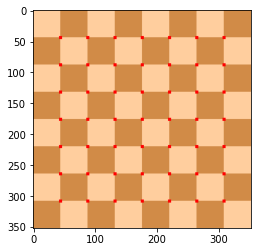

In [19]:
plt.imshow(flat_chess)

In [21]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [22]:
dst = cv2.dilate(dst,None)

In [23]:
real_chess[dst>0.01*dst.max()] = [255,0,0] # RGB

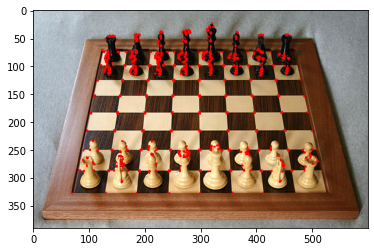

In [24]:
plt.imshow(real_chess)

In [25]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,5,0.01,10) # 매개변수 10 으로 설정함

In [26]:
corners

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]]], dtype=float32)

In [28]:
corners = np.int8(corners)

In [29]:
corners

array([[[  52,   52]],

       [[   8,   52]],

       [[ -36,   52]],

       [[ -80,   52]],

       [[-124,   52]]], dtype=int8)

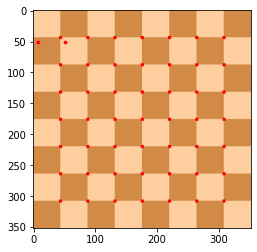

In [37]:
for i in corners:
  x,y = i.ravel()
  cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

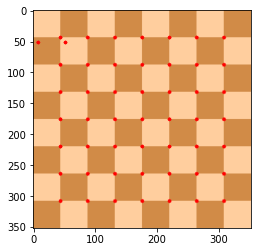

In [38]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,64,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

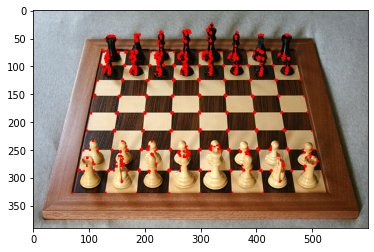

In [39]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,255,-1)

plt.imshow(real_chess)